# Global Count Datathon 2021

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import re
from wordcloud import WordCloud
from gensim.parsing.preprocessing import remove_stopwords
from textblob import TextBlob
from IPython.display import display, HTML
import openpyxl
import warnings
%matplotlib inline

# Set pandas options
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:,.1f}'.format
warnings.filterwarnings("ignore")


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Data
folder = "/Users/hasanserdaraltan/OneDrive/Files/Education/Data_Science/Statistics_without_Borders/Projects/Global Count Datathon/Data/"
# data = pd.read_excel(folder + "globalcount_data.xlsx", sheet_name="globalcount_data")
data = pd.read_csv(folder + "globalcount_data.csv")

data_columns = list(data.columns)
relevant_cols = data_columns[5:80] + ['progress_10_years_tr']
data.head(3)

,row_id,unique_id,survey_type,iso3166,surveydate,city_town,city_town_tr,country_of_residence,gender_not_listed,cisgender_man,cisgender_woman,non_conforming_or_non_binary,gender_choose_not_to_identify,man,transgender_man,transgender_woman,woman,racial_identity_not_listed,asian,biracial_or_mixed,black_or_of_african_descent,hispanic_or_latinx,choose_not_to_identify,indigenous,indigenous_central_or_south_american,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white,age,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,issue_person_immigrant_and_refugee_rights,issue_person_indigenous_andor_roma_rights,issue_person_LGBTQI+_rights,issue_person_racial_equity,issue_person_reproductive_freedom_and_bodily_autonomy,issue_person_sexual_reproductive_and_parental_health,barrier_person_civil_rights_and_freedoms,barrier_person_disability_rights,barrier_person_economic_and_workers_rights,barrier_person_education_and_youth_empowerment,barrier_person_ending_violence_harassment_and_abuse,barrier_person_environmental_justice,barrier_person_immigrant_and_refugee_rights,barrier_person_indigenous_andor_roma_rights,barrier_person_LGBTQI+_rights,barrier_racial_equity,barrier_person_reproductive_freedom_and_bodily_autonomy,barrier_person_sexual_reproductive_and_parental_health,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_city_sexual_reproductive_and_parental_health,barrier_city_civil_rights_and_freedoms,barrier_city_disability_rights,barrier_city_economic_and_workers_rights,barrier_city_education_and_youth_empowerment,barrier_city_ending_violence_harassment_and_abuse,barrier_city_environmental_justice,barrier_city_immigrant_and_refugee_rights,barrier_city_indigenous_andor_roma_rights,barrier_city_LGBTQI+_rights,barrier_city_racial_equity,barrier_city_reproductive_freedom_and_bodily_autonomy,barrier_city_sexual_reproductive_and_parental_health,npo_1,npo_2,npo_3,progress_10_years,npo_1_tr,npo_2_tr,npo_3_tr,progress_10_years_tr,language,langauge_score
0,2,12327918977,long,UK,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern Ireland,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,1,0,0,0,0,1,0,1,0,0,0,NaN,Cultural/Social,NaN,NaN,NaN,NaN,Political,NaN,Cultural/Social,NaN,NaN,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,Cultural/Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,12327959040,long,UK,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern Ireland,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,0,0,0,1,0,0,1,1,0,0,0,NaN,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,Cultural/Social,NaN,NaN,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Economic,NaN,Cultural/Social,NaN,NaN,NaN,Na,na,NaN,NaN,On,on,ON,NaN,pl,1.0
2,4,12340367937,long,CA,1/20/2021 20:22,Waterloo,Waterloo,Canada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Parameters

TITLE_COLOR = "#690069"
LABEL_COLOR = "#690069"
TITLE_FONT_SIZE = 36
LABEL_FONT_SIZE = 30
TICK_SIZE = 26
PAD = 15
RATIO = 0.5
SHOW_ROW=10
CMAP1 = ["#F0F0FF", "#C8C8FF", "#A0A0F5", "#7878CD", "#5050A5", "#28287D", "#000055"]
CMAP2 = ["#A0A0F5", "#A0A0F5", "#46469B"]

In [4]:
"""This function has been retrieved from:
- https://github.com/myrthings/catscatter/blob/master/catscatter.py 
- https://towardsdatascience.com/visualize-categorical-relationships-with-catscatter-e60cdb164395
and a minor adjustment has been made."""

def catscatter(df,colx,coly,cols,color=['grey','black'],ratio=10,font='Helvetica', fontsize=20):

    # Create a dict to encode the categeories into numbers (sorted)
    colx_codes=dict(zip(df[colx].unique(),range(len(df[colx].unique()))))
    coly_codes=dict(zip(df[coly].unique(),range(len(df[coly].unique()))))
    
    # Apply the encoding
    df[colx]=df[colx].apply(lambda x: colx_codes[x])
    df[coly]=df[coly].apply(lambda x: coly_codes[x])
    
    
    # Prepare the aspect of the plot
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    plt.rcParams['font.sans-serif']=font
    plt.rcParams['xtick.color']=color[-1]
    plt.rcParams['ytick.color']=color[-1]
    plt.box(False)

    
    # Plot all the lines for the background
    for num in range(len(coly_codes)):
        plt.hlines(num,-1,len(colx_codes)+1,linestyle='dashed',linewidth=1,color=color[num%2],alpha=0.5)
    for num in range(len(colx_codes)):
        plt.vlines(num,-1,len(coly_codes)+1,linestyle='dashed',linewidth=1,color=color[num%2],alpha=0.5)
        
    # Plot the scatter plot with the numbers
    plt.scatter(df[colx],
               df[coly],
               s=df[cols]*ratio,
               zorder=2,
               color=color[-1])
    
    # Change the ticks numbers to categories and limit them
    plt.xticks(ticks=list(colx_codes.values()),labels=colx_codes.keys(),rotation=90, fontsize=fontsize)
    plt.yticks(ticks=list(coly_codes.values()),labels=coly_codes.keys(), fontsize=fontsize)
    plt.xlim(xmin=-1,xmax=len(colx_codes))
    plt.ylim(ymin=-1,ymax=len(coly_codes))
    


In [5]:
# Functions

# Change names
def update_col_names_2(names_list):
    
    # Replace "_" character and remove empty spaces
    names_list = list(map(lambda x: x.replace("_", " ").strip(), names_list))
    
    # Capitalize the very first letter of the column name
    names_list = [x.capitalize() for x in names_list]
    
    return names_list


# Select the columns by a search text
def col_filter(search_text):
    
    # Filter out the columns that don't start with the search_text
    selected_cols = list(filter(lambda x: x.startswith(search_text), data_columns))
    
    return selected_cols


# Change old column names
def update_col_names(columns, remove_word=None):
    
    # Remove the word from the column name, which is specified as remove_word
    new_col_names = list(map(lambda x: x.replace(remove_word, "") if remove_word in x else x, columns))
    
    # Replace and capitalize
    new_col_names = update_col_names_2(new_col_names)

    return new_col_names


# Rename the columns with new ones
def prettify_cols(data_subset, old_column_names, new_column_names):
    
    # Create a dictionary with old column names as keys and new column names as values
    zipped_cols = zip(old_column_names, new_column_names)
    replace_col_name_dict = {item[0]:item[1] for item in zipped_cols}
    
    # Replace old column names with new column names
    data_subset = data_subset.rename(columns=replace_col_name_dict)
    
    return data_subset


# Create a subset of data with the selected columns
def create_data_subset(subset_columns):
    
    # Determine the subset data with selected columns
    data_subset = data[subset_columns]
#     display(data_subset.head(1))
    
    return data_subset


# Check if any nan rows
def check_na(data_subset, if_display=False):
    
    # Get data information
    if if_display==True:
        display(data_subset.info())
        print("\n")
    
    # Find and display which rows have nan values in the dataset
    idx = data_subset.index[data_subset.isnull().all(1)]
    nans = data_subset.loc[idx]
    if len(nans) > 0:
        display(nans)
        print("\n")

        
# Data preparation for catscatter plot
def plot_catscatter(data_subset, m=20):
    
    # Get x and y columns of the first m rows
    x_cols = data_subset.iloc[:, 1:].columns.tolist()
    y_cols = data_subset.iloc[:m, 0].tolist()
    
    # Find the lengths of x and y columns
    x_cols_len = len(x_cols)
    y_cols_len = len(y_cols)
    
    # Expand the y column
    y_cols = [[c] * x_cols_len for c in y_cols]
    y_cols = list(np.concatenate(y_cols).flat)
    
    # Expand the x column
    x_cols = x_cols * y_cols_len
    
    # Get the cell values in the dataset
    data_values = data_subset.iloc[:m, :].values.tolist()
    values = [v[1:] for v in data_values]
    values = list(np.concatenate(values).flat)
    
    return x_cols, y_cols, values


# Create correlation matrix
def corr_table(df, cols_1, all_cols, index_name, col_name):
    
    # Create correlation matrix dataframe
    df_corr = df.corr()
    
    # Drop unnecessary columns
    df_corr.drop(cols_1, inplace=True, axis=1)
    
    # Drop unnecessary rows
    cols_2 = [item for item in all_cols if item not in cols_1]
    df_corr.drop(cols_2, inplace=True, axis=0) 
    
    # Change index column name
    df_corr.index.name = index_name

    # Change columns name
    df_corr.columns.name = col_name
    
    return df_corr 


# Heatmap
def plot_heatmap(df, heatmap_title, x_label, y_label, y_loc, w, h):
    f, ax = plt.subplots(figsize=(w, h)) 
    plt.suptitle(heatmap_title, fontsize=TITLE_FONT_SIZE*RATIO, color=TITLE_COLOR, ha="center", y=y_loc)
    heatplot = sns.heatmap(df, cmap=CMAP1, linewidths=5, fmt="0.01g", annot=True, square=False, xticklabels=True, yticklabels=True, cbar=True)
    heatplot.set_xlabel(x_label,fontsize=LABEL_FONT_SIZE*RATIO, color = LABEL_COLOR, labelpad=PAD)
    heatplot.set_ylabel(y_label,fontsize=LABEL_FONT_SIZE*RATIO, color = LABEL_COLOR, labelpad=PAD)
    heatplot.yaxis.set_label_position("left")
    heatplot.xaxis.set_label_position("bottom")
    heatplot.tick_params(axis='x', labelsize=TICK_SIZE*RATIO, labelbottom = False, bottom=False, top = False, labeltop=True, labelrotation=90, pad=PAD)
    heatplot.tick_params(axis='y', labelsize=TICK_SIZE*RATIO, labelleft=True, labelright=False, left=False, labelrotation=0, pad=PAD)
    heatplot.set_xticklabels(labels=heatplot.get_xticklabels(), ha='left')
    plt.show()

    
# Hide axes
def hide_axes(this_ax):
    this_ax.set_frame_on(False)
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    return this_ax


# Prepare data for stacked bar charts
def prepare_for_stacked_bar(df, new_col_names):  

    # Count values in data columns and create a new dataframe
    col_value_counts = df.apply(lambda x: x.value_counts()).fillna(0).astype(int)

    # Create a dictionary with row name as key and row values as value
    barriers_dict = {}

    for barrier in barriers:
        barriers_dict[barrier] = col_value_counts.loc[barrier].values.tolist()
    
    # create DataFrame
    df_stacked_bar = pd.DataFrame({'Political': barriers_dict["Political"],
                                   'Cultural/Social': barriers_dict["Cultural/Social"],
                                   'Economic': barriers_dict["Economic"],
                                   'Education': barriers_dict["Education"], 
                                   'Technological': barriers_dict["Technological"]},
                                    index=new_col_names)
    
    return col_value_counts, df_stacked_bar


# Plot stacked bar chart
def stacked_bar(df, title, x_label, y_label, y_loc):
    
    # Figure parameters
    plt.rcParams["figure.figsize"] = (12, 6)

    # Create stacked bar chart for monthly temperatures
    df.plot(kind='bar', stacked=True, color=CMAP1)

    # Labels for x & y axis
    plt.xlabel(x_label, fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
    plt.ylabel(y_label, fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
    plt.xticks(fontsize=TICK_SIZE*RATIO)
    plt.yticks(fontsize=TICK_SIZE*RATIO)
    plt.grid(True, axis="y", color=LABEL_COLOR, linewidth=0.6, alpha=0.3)
    
    # Title of plot
    plt.title(title, fontsize=TITLE_FONT_SIZE*RATIO, color=TITLE_COLOR, y=y_loc)

    plt.show()
    
    
def clean_text(y):

    # Replace 
    str_text = str(y).replace("\\r", "").replace("\\n", "").replace("'s'", "")
    
    # Filter in only letters
    pattern = "[a-zA-Z]*"
    str_text = re.findall(pattern, str_text)
    
    # Lowercase
    str_text = [x.lower() for x in str_text]
    
    # Gender neutralize comments
    out_words = ["gender", "cisgender", "man", "men", "men's", "woman", "women", "women's, ""transgender", "lgbtqi" 
                 "lgbt", "lgbtq", "lesbian", "gay", "bisexual", "non-binary", "girl", "boy", "girls", "boys"]
    
    str_text = [x for x in str_text if not x in out_words]
    
    # Convert to string
    str_text = " ".join(str_text)
    
    # Remove stopwords
    str_text = remove_stopwords(str_text)
    
    return str_text


# Plot bidirectional chart
def bidirectional_plot(top_x, top_y, bottom_x, bottom_y, title, x_label, y_label):
    
    # Layout
    fig, axes = plt.subplots(figsize=(10,10), nrows=2, ncols=1, sharex=True)
    fig.tight_layout()

    # Plot
    axes[0].barh(top_y, top_x, align='center', color=CMAP1[2])
    axes[1].barh(bottom_y, bottom_x, align='center', color=CMAP1[4])

    # Invert x axis
    axes[0].invert_xaxis() 
    plt.gca().invert_xaxis()

    # Top chart decoration
    axes[0].set_title(title, fontsize=TITLE_FONT_SIZE*RATIO, pad=PAD, color=TITLE_COLOR)
    axes[0].set_yticklabels(top_y, fontsize=TICK_SIZE*RATIO)
    axes[0].yaxis.tick_left()
    axes[0].tick_params(axis='y', colors=CMAP1[6])
    axes[0].xaxis.set_ticks_position('none')
    axes[0].grid(True, axis="both", color=LABEL_COLOR, linewidth=0.6, alpha=0.3)
    for position in ['top', 'bottom', 'left', 'right']:
        axes[0].spines[position].set_linewidth(0)  # width
        axes[0].spines[position].set_color(CMAP1[6])   # color

    # Bottom chart decoration
    axes[1].set_yticklabels(bottom_y, fontsize=TICK_SIZE*RATIO)
    axes[1].yaxis.tick_left()
    axes[1].tick_params(axis='y', colors=CMAP1[6])
    axes[1].xaxis.set_ticks_position("bottom")
    axes[1].grid(True, axis="both", color=LABEL_COLOR, linewidth=0.6, alpha=0.3)
    for position in ['top','left', 'right']:
        axes[1].spines[position].set_linewidth(0)  # width
        axes[1].spines[position].set_color(CMAP1[6])   # color

    # Labels for x & y axis
    plt.xlabel(x_label, fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
    fig.text(0.001, 0.48, y_label, va='center', rotation='vertical', fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR)

    # Adjust subplots
    plt.subplots_adjust(wspace=0, hspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

    plt.show()
    
    
# Create a dataframe for bidirectional chart
def prepare_for_bidirectional_chart(df, n, col, by):
    
    # Create a temporary df
    df_temp = df.copy(deep=True)

    # Find single comment countries
    df_temp = df_temp.groupby([col]).count().reset_index()
    delete_rows = df_temp[df_temp["Polarity"] == 1].index.tolist()
    del df_temp

    # Aggregate the data
    df = df.groupby([col]).mean().reset_index()

    # Drop single comment countries
    df.drop(delete_rows, axis=0, inplace=True)

    # Find the highest and lowest score countries and sort them
    df_top = df.nlargest(n, 'Polarity')
    df_top.sort_values(by=by, ascending=True, inplace=True)
    df_bottom = df.nsmallest(n, 'Polarity')
    df_bottom.sort_values(by=by, ascending=True, inplace=True)
    
    df = pd.concat([df_top, df_bottom], ignore_index = False)
    
    return df, df_top, df_bottom
    
    
    

In [6]:
# Lists

# Genders identified
genders = ['gender_not_listed',
             'cisgender_man',
             'cisgender_woman',
             'non_conforming_or_non_binary',
             'gender_choose_not_to_identify',
             'man',
             'transgender_man',
             'transgender_woman',
             'woman'
          ]

# Racial identities
racial_ids = ['racial_identity_not_listed',
             'asian',
             'biracial_or_mixed',
             'black_or_of_african_descent',
             'hispanic_or_latinx',
             'choose_not_to_identify',
             'indigenous',
             'indigenous_central_or_south_american',
             'middle_eastern',
             'native_american',
             'native_hawaiian',
             'north_african',
             'pacific_islander',
             'south_asian',
             'southeast_asian',
             'white'
            ]

# Barrier categories
barriers = ["Political", "Cultural/Social", "Economic", "Education", "Technological"]

genders_revised = update_col_names_2(genders)
racial_ids_revised = update_col_names_2(racial_ids)

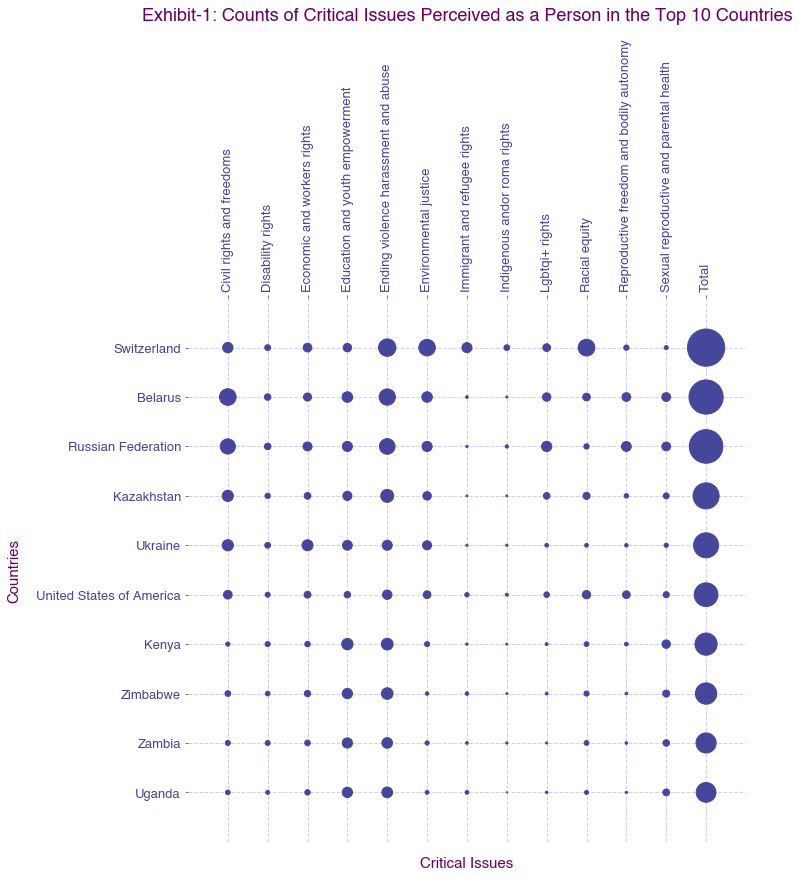

,Civil rights and freedoms,Disability rights,Economic and workers rights,Education and youth empowerment,Ending violence harassment and abuse,Environmental justice,Immigrant and refugee rights,Indigenous andor roma rights,Lgbtqi+ rights,Racial equity,Reproductive freedom and bodily autonomy,Sexual reproductive and parental health,Total
Country of residence,,,,,,,,,,,,,
Switzerland,538,172,377,358,1518,1367,506,163,300,1398,141,84,6922
Belarus,1384,213,330,556,1330,555,36,21,353,292,381,389,5840
Russian Federation,1153,215,408,508,1223,514,24,53,527,141,484,384,5634
Kazakhstan,627,143,224,415,846,358,19,18,218,251,99,179,3397
Ukraine,626,168,603,483,502,414,23,24,68,68,59,90,3128
United States of America,375,124,237,210,446,302,94,42,155,345,299,186,2815
Kenya,90,128,148,646,693,130,26,19,42,112,68,354,2456
Zimbabwe,162,108,202,533,676,60,64,18,41,131,34,250,2279
Zambia,127,121,159,526,565,86,35,25,22,113,34,215,2028


In [7]:
# EXHIBIT-1: Personal issues by country of residence

# Specify the text to use in filtering out unncessary column
filter_out = "issue_person"

# Find the necesssary columns
filtered_cols = col_filter(filter_out)
subset_columns = ["country_of_residence"] + filtered_cols

# Create a data subset with the filtered-in columns
data_country_personal_issues = create_data_subset(subset_columns)

# Check any nan value rows
check_na(data_country_personal_issues, if_display=False)

# Create more plot-presentable names
new_col_names = update_col_names(subset_columns, remove_word=filter_out)

# Replace the column names with more plot-presentable names
data_country_personal_issues = prettify_cols(data_country_personal_issues, subset_columns, new_col_names)

# Aggregate the data
data_country_personal_issues = data_country_personal_issues.groupby(["Country of residence"]).sum().reset_index()

# Add total column
data_country_personal_issues["Total"] = data_country_personal_issues.iloc[:,1:].sum(axis=1)

# Sort by Total and slice the data
data_country_personal_issues = data_country_personal_issues.nlargest(SHOW_ROW, 'Total')
data_country_personal_issues.sort_values(by=['Total'], ascending=True, inplace=True)

# Get the plot data
x_cols, y_cols, values = plot_catscatter(data_country_personal_issues, SHOW_ROW)
catscatter_data = pd.DataFrame({"country": y_cols, "personal_issues": x_cols, "responses": values})

# Figure parameters
fig = plt.figure(figsize=(10, 10))

# Plot
catscatter(catscatter_data, "personal_issues", "country", "responses", color=CMAP2, fontsize=TICK_SIZE*RATIO, ratio=RATIO-0.3)
plt.title("Exhibit-1: Counts of Critical Issues Perceived as a Person in the Top 10 Countries", fontsize=TITLE_FONT_SIZE*RATIO, color=TITLE_COLOR, y=1.5)
plt.xlabel("Critical Issues", fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
plt.ylabel("Countries", fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
plt.show()

# Set the first column as index
data_country_personal_issues = data_country_personal_issues.set_index("Country of residence")

# Display the data
print("\n")
data_country_personal_issues.sort_values(by=['Total'], ascending=False, inplace=True)
display(data_country_personal_issues.head(SHOW_ROW))


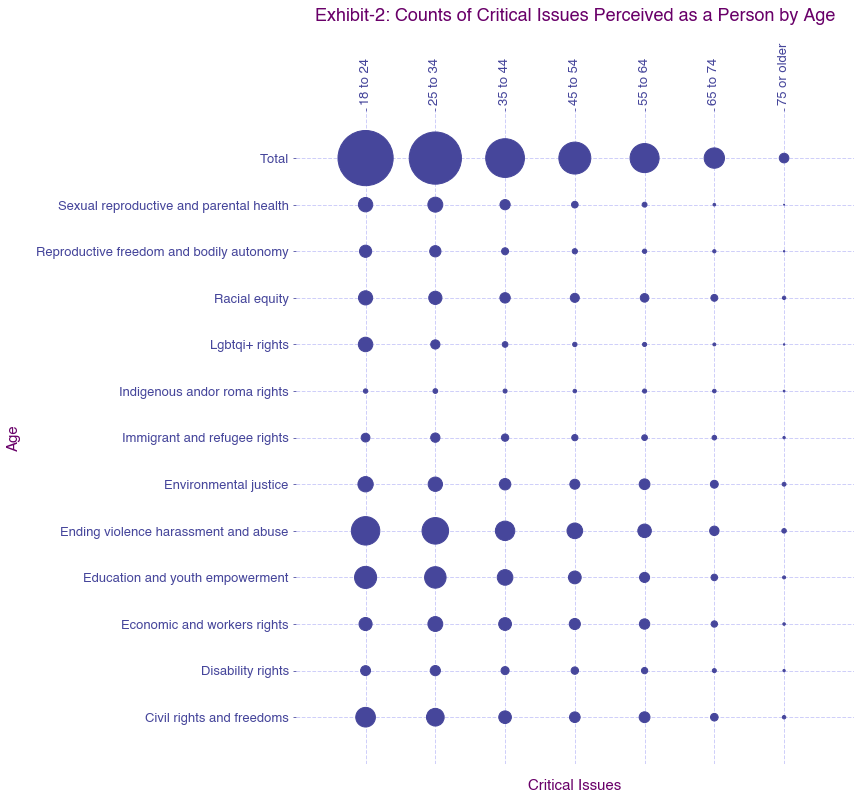

,Civil rights and freedoms,Disability rights,Economic and workers rights,Education and youth empowerment,Ending violence harassment and abuse,Environmental justice,Immigrant and refugee rights,Indigenous andor roma rights,Lgbtqi+ rights,Racial equity,Reproductive freedom and bodily autonomy,Sexual reproductive and parental health,Total
Age,,,,,,,,,,,,,
18 to 24,1926,493,854,2433,4049,1170,381,95,1046,1001,740,1029,15217
25 to 34,1563,519,1103,2305,3522,1025,431,111,423,871,634,1114,13621
35 to 44,797,325,814,1218,1878,652,268,81,161,538,245,521,7498
45 to 54,566,275,615,813,1220,495,194,61,95,406,137,220,5097
55 to 64,585,198,535,508,915,572,162,84,84,368,92,118,4221
65 to 74,290,80,203,212,444,309,104,63,42,235,52,34,2068
75 or older,59,27,32,45,102,73,28,15,10,56,9,5,461


In [8]:
# EXHIBIT-2: Personal issues by age

# Specify the text to use in filtering out unncessary column
filter_out = "issue_person"

# Find the necesssary columns
filtered_cols = col_filter(filter_out)
subset_columns = ["age"] + filtered_cols

# Create a data subset with the filtered-in columns
data_age_personal_issues = create_data_subset(subset_columns)

# Check any nan value rows
check_na(data_age_personal_issues, if_display=False)

# Create more plot-presentable names
new_col_names = update_col_names(subset_columns, remove_word=filter_out)

# Replace the column names with more plot-presentable names
data_age_personal_issues = prettify_cols(data_age_personal_issues, subset_columns, new_col_names)

# Aggregate the data
data_age_personal_issues = data_age_personal_issues.groupby(["Age"]).sum().reset_index()

# Add total column
data_age_personal_issues["Total"] = data_age_personal_issues.iloc[:,1:].sum(axis=1)

# Sort by Age
data_age_personal_issues.sort_values(by=["Age"], ascending=True, inplace=True)

# Get the plot data
x_cols, y_cols, values = plot_catscatter(data_age_personal_issues, SHOW_ROW)
catscatter_data = pd.DataFrame({"age": y_cols, "personal_issues": x_cols, "responses": values})

# Figure parameters
fig = plt.figure(figsize=(10, 12))

# Plot
catscatter(catscatter_data, "age", "personal_issues", "responses", color=CMAP2, fontsize=TICK_SIZE*RATIO, ratio=RATIO-0.3)
plt.title("Exhibit-2: Counts of Critical Issues Perceived as a Person by Age", fontsize=TITLE_FONT_SIZE*RATIO, color=TITLE_COLOR, y=1.13)
plt.xlabel("Critical Issues", fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
plt.ylabel("Age", fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
plt.show()

# Set the first column as index
data_age_personal_issues = data_age_personal_issues.set_index("Age")

# Display the data
print("\n")
display(data_age_personal_issues.head(SHOW_ROW))



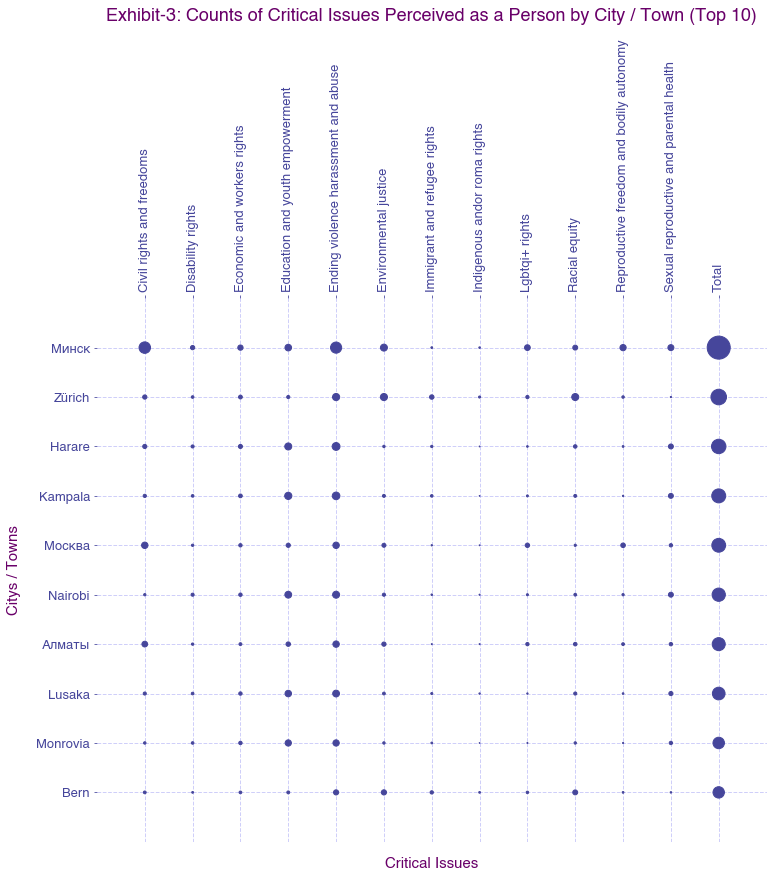

,Civil rights and freedoms,Disability rights,Economic and workers rights,Education and youth empowerment,Ending violence harassment and abuse,Environmental justice,Immigrant and refugee rights,Indigenous andor roma rights,Lgbtqi+ rights,Racial equity,Reproductive freedom and bodily autonomy,Sexual reproductive and parental health,Total
City town,,,,,,,,,,,,,
Минск,660,90,140,218,619,243,15,12,165,120,193,179,2654
Zürich,90,34,72,49,257,252,98,22,52,247,31,7,1211
Harare,85,47,82,246,308,29,26,4,14,60,16,122,1039
Kampala,52,34,69,259,290,44,33,3,19,43,8,121,975
Москва,206,27,56,88,206,79,9,4,95,25,104,56,955
Nairobi,26,47,58,232,244,49,12,6,21,38,26,120,879
Алматы,164,27,41,99,205,90,5,5,54,62,39,58,849
Lusaka,48,34,57,210,231,39,21,9,9,48,13,85,804
Monrovia,30,33,57,196,198,29,15,3,5,29,6,56,657


In [9]:
# EXHIBIT-3: Personal issues by citys/towns

# Specify the text to use in filtering out unncessary column
filter_out = "issue_person"

# Find the necesssary columns
filtered_cols = col_filter(filter_out)
subset_columns = ["city_town"] + filtered_cols

# Create a data subset with the filtered-in columns
data_city_personal_issues = create_data_subset(subset_columns)

# Check any nan value rows
check_na(data_city_personal_issues, if_display=False)

# Create more plot-presentable names
new_col_names = update_col_names(subset_columns, remove_word=filter_out)

# Replace the column names with more plot-presentable names
data_city_personal_issues = prettify_cols(data_city_personal_issues, subset_columns, new_col_names)

# Aggregate the data
data_city_personal_issues = data_city_personal_issues.groupby(["City town"]).sum().reset_index()

# Add total column
data_city_personal_issues["Total"] = data_city_personal_issues.iloc[:,1:].sum(axis=1)

# Sort by Total and slice the data
data_city_personal_issues = data_city_personal_issues.nlargest(SHOW_ROW, 'Total')
data_city_personal_issues.sort_values(by=['Total'], ascending=True, inplace=True)

# Get the plot data
x_cols, y_cols, values = plot_catscatter(data_city_personal_issues, SHOW_ROW)
catscatter_data = pd.DataFrame({"city": y_cols, "personal_issues": x_cols, "responses": values})

# Figure parameters
fig = plt.figure(figsize=(12, 10))

# Plot
catscatter(catscatter_data, "personal_issues", "city", "responses", color=CMAP2, fontsize=TICK_SIZE*RATIO, ratio=RATIO-0.3)
plt.title("Exhibit-3: Counts of Critical Issues Perceived as a Person by City / Town (Top 10)", fontsize=TITLE_FONT_SIZE*RATIO, color=TITLE_COLOR, y=1.5)
plt.xlabel("Critical Issues", fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
plt.ylabel("Citys / Towns", fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
plt.show()

# Set the first column as index
data_city_personal_issues = data_city_personal_issues.set_index("City town")

# Display the data
print("\n")
# display(data_city_personal_issues.head(SHOW_ROW))
data_city_personal_issues.sort_values(by=['Total'], ascending=False, inplace=True)
display(data_city_personal_issues.head(SHOW_ROW))


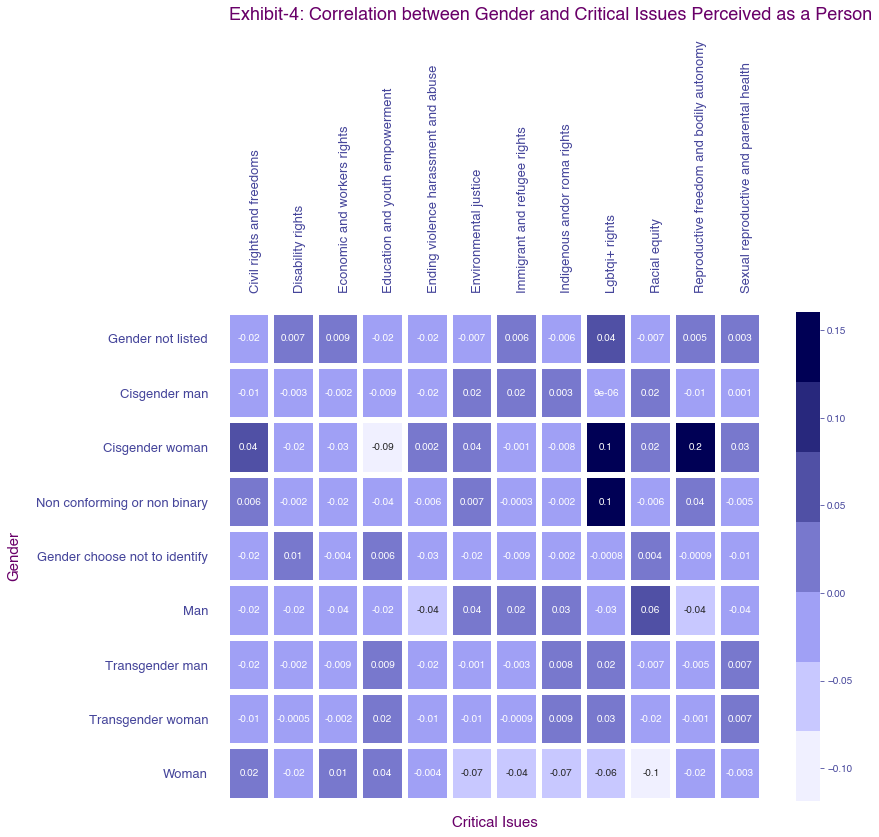

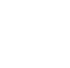

In [10]:
# EXHIBIT-4: Correlation between personal issues and gender

# Specify the text to use in filtering out unncessary column
filter_out = "issue_person"

# Find the necesssary columns
filtered_cols = col_filter(filter_out)
subset_columns = genders + filtered_cols

# Create a data subset with the filtered-in columns
data_gender_personal_issues = create_data_subset(subset_columns)

# Check any nan value rows
check_na(data_gender_personal_issues, if_display=False)

# Create more plot-presentable names
new_col_names = update_col_names(subset_columns, remove_word=filter_out)

# Replace the column names with more plot-presentable names
data_gender_personal_issues = prettify_cols(data_gender_personal_issues, subset_columns, new_col_names)

data_gender_personal_issues_corr = corr_table(data_gender_personal_issues, genders_revised, new_col_names, 
                                              "Gender", "Critical Isues")

# Plot correlation 
x_label = "Critical Isues"
y_label = "Gender"
y_loc = 1.35
w = 12
h = 9
heatmap_title = "Exhibit-4: Correlation between Gender and Critical Issues Perceived as a Person"
plot_heatmap(data_gender_personal_issues_corr, heatmap_title, x_label, y_label, y_loc, w, h)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,1))
hide_axes(ax)
plt.show()


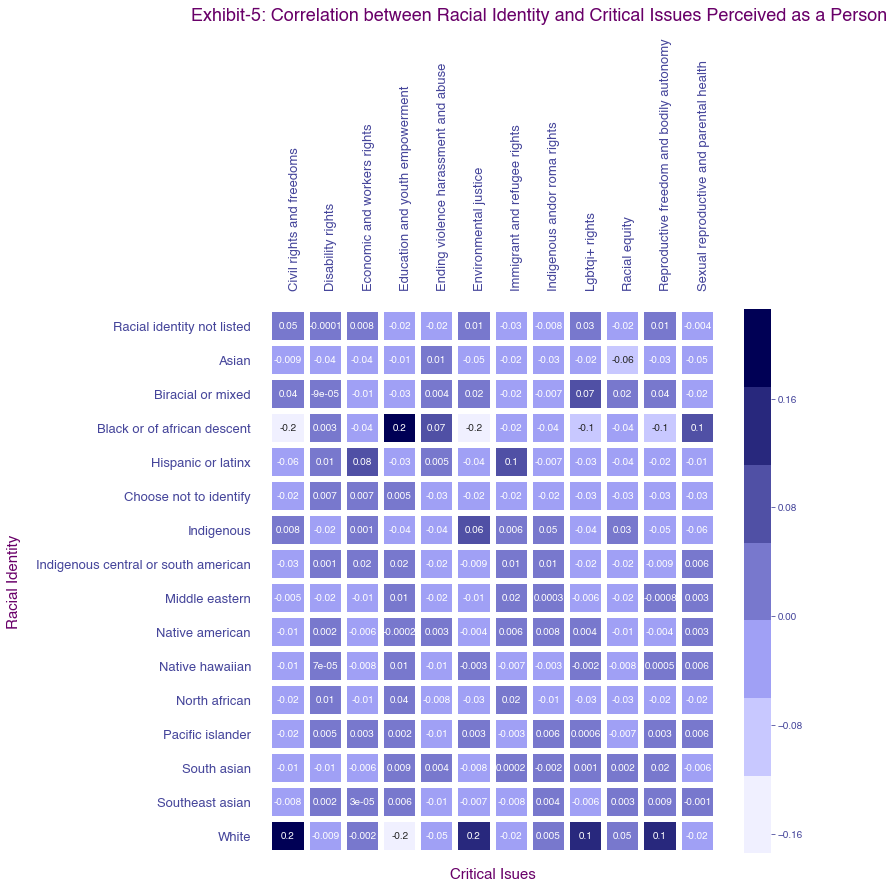

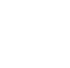

In [11]:
# EXHIBIT-5: Correlation between personal issues and racial identity

# Specify the text to use in filtering out unncessary column
filter_out = "issue_person"

# Find the necesssary columns
filtered_cols = col_filter(filter_out)
subset_columns = racial_ids + filtered_cols

# Create a data subset with the filtered-in columns
data_race_personal_issues = create_data_subset(subset_columns)

# Check any nan value rows
check_na(data_race_personal_issues, if_display=False)

# Create more plot-presentable names
new_col_names = update_col_names(subset_columns, remove_word=filter_out)

# Replace the column names with more plot-presentable names
data_race_personal_issues = prettify_cols(data_race_personal_issues, subset_columns, new_col_names)

data_race_personal_issues_corr = corr_table(data_race_personal_issues, racial_ids_revised, new_col_names, 
                                              "Racial Identity", "Critical Isues")

# Plot correlation 
x_label = "Critical Isues"
y_label = "Racial Identity"
y_loc = 1.30
w = 10
h = 10
heatmap_title = "Exhibit-5: Correlation between Racial Identity and Critical Issues Perceived as a Person"
plot_heatmap(data_race_personal_issues_corr, heatmap_title, x_label, y_label, y_loc, w, h)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,1))
hide_axes(ax)
plt.show()


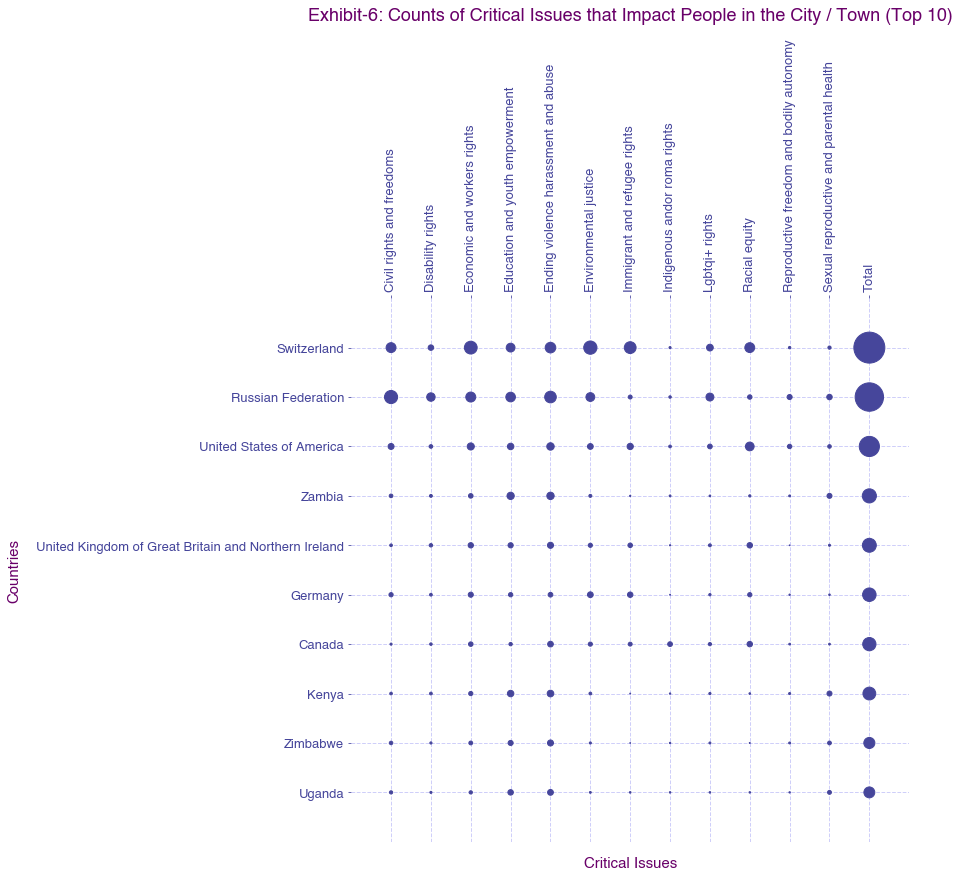

,Civil rights and freedoms,Disability rights,Economic and workers rights,Education and youth empowerment,Ending violence harassment and abuse,Environmental justice,Immigrant and refugee rights,Indigenous andor roma rights,Lgbtqi+ rights,Racial equity,Reproductive freedom and bodily autonomy,Sexual reproductive and parental health,Total
Country of residence,,,,,,,,,,,,,
Switzerland,490,152,817,385,561,879,696,22,227,487,28,52,4796
Russian Federation,861,358,496,460,674,387,76,31,315,97,127,149,4031
United States of America,178,65,253,208,277,167,197,37,108,381,95,64,2030
Zambia,66,41,104,264,271,44,8,17,14,24,17,124,994
United Kingdom of Great Britain and Northern Ireland,36,58,143,134,186,86,102,7,42,149,3,21,967
Germany,89,38,130,91,109,165,148,4,27,89,9,12,911
Canada,22,32,102,56,162,85,76,113,52,148,15,16,879
Kenya,35,38,87,207,220,38,4,9,24,13,21,125,821
Zimbabwe,61,24,72,128,181,22,3,9,19,5,18,71,613


In [12]:
# EXHIBIT-6: Regional issues by country of residence

# Specify the text to use in filtering out unncessary column
filter_out = "issue_city"

# Find the necesssary columns
filtered_cols = col_filter(filter_out)
subset_columns = ["country_of_residence"] + filtered_cols

# Create a data subset with the filtered-in columns
data_country_regional_issues = create_data_subset(subset_columns)

# Check any nan value rows
check_na(data_country_regional_issues, if_display=False)

# Create more plot-presentable names
new_col_names = update_col_names(subset_columns, remove_word=filter_out)

# Replace the column names with more plot-presentable names
data_country_regional_issues = prettify_cols(data_country_regional_issues, subset_columns, new_col_names)

# Aggregate the data
data_country_regional_issues = data_country_regional_issues.groupby(["Country of residence"]).sum().reset_index()

# Add total column
data_country_regional_issues["Total"] = data_country_regional_issues.iloc[:,1:].sum(axis=1)

# Sort by Total and slice the data
data_country_regional_issues = data_country_regional_issues.nlargest(SHOW_ROW, 'Total')
data_country_regional_issues.sort_values(by=['Total'], ascending=True, inplace=True)

# Get the plot data
x_cols, y_cols, values = plot_catscatter(data_country_regional_issues, SHOW_ROW)
catscatter_data = pd.DataFrame({"country": y_cols, "regional_issues": x_cols, "responses": values})

# Figure parameters
fig = plt.figure(figsize=(10, 10))

# Plot
catscatter(catscatter_data, "regional_issues", "country", "responses", color=CMAP2, fontsize=TICK_SIZE*RATIO, ratio=RATIO-0.3)
plt.title("Exhibit-6: Counts of Critical Issues that Impact People in the City / Town (Top 10)", fontsize=TITLE_FONT_SIZE*RATIO, color=TITLE_COLOR, y=1.5)
plt.xlabel("Critical Issues", fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
plt.ylabel("Countries", fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
plt.show()

# Set the first column as index
data_country_regional_issues = data_country_regional_issues.set_index("Country of residence")

# Display the data
print("\n")
data_country_regional_issues.sort_values(by=['Total'], ascending=False, inplace=True)
display(data_country_regional_issues.head(SHOW_ROW))


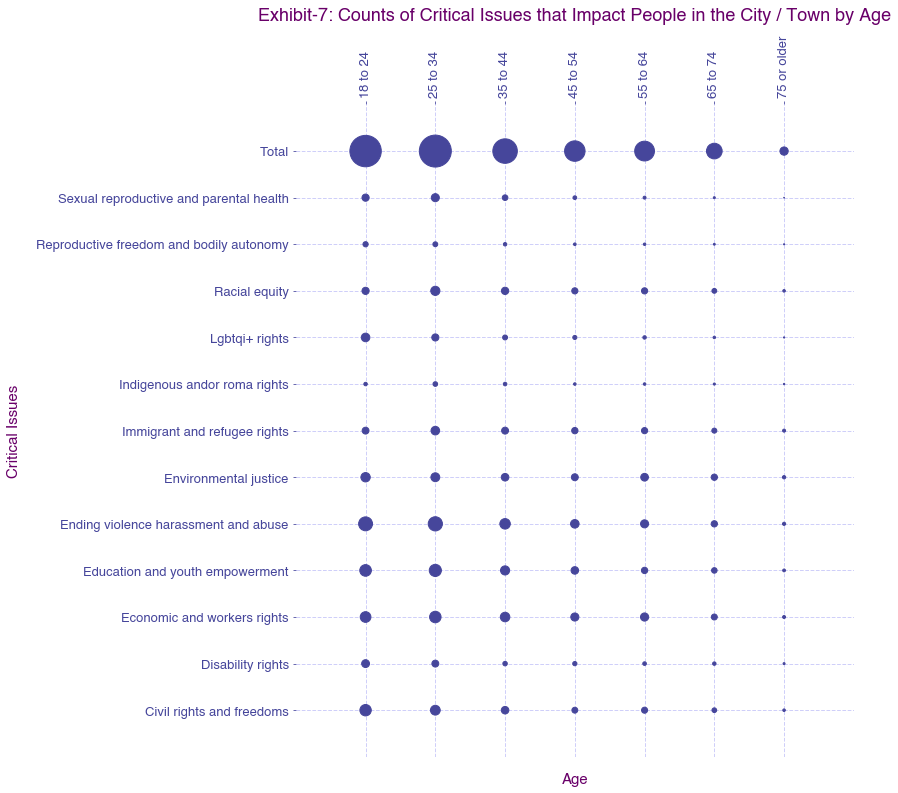

,Civil rights and freedoms,Disability rights,Economic and workers rights,Education and youth empowerment,Ending violence harassment and abuse,Environmental justice,Immigrant and refugee rights,Indigenous andor roma rights,Lgbtqi+ rights,Racial equity,Reproductive freedom and bodily autonomy,Sexual reproductive and parental health,Total
Age,,,,,,,,,,,,,
18 to 24,650,309,572,677,967,439,235,60,367,258,136,258,4928
25 to 34,479,237,659,737,1008,393,370,107,253,420,118,323,5104
35 to 44,285,100,453,417,550,288,240,63,120,267,59,158,3000
45 to 54,173,89,329,285,366,239,201,33,83,191,35,68,2092
55 to 64,184,66,335,200,325,297,192,32,59,191,30,43,1954
65 to 74,110,59,178,154,197,197,126,22,30,115,17,20,1225
75 or older,33,20,44,39,50,54,45,9,7,33,6,3,343


In [13]:
# EXHIBIT-7: Regional issues by age

# Specify the text to use in filtering out unncessary column
filter_out = "issue_city"

# Find the necesssary columns
filtered_cols = col_filter(filter_out)
subset_columns = ["age"] + filtered_cols

# Create a data subset with the filtered-in columns
data_age_regional_issues = create_data_subset(subset_columns)

# Check any nan value rows
check_na(data_age_regional_issues, if_display=False)

# Create more plot-presentable names
new_col_names = update_col_names(subset_columns, remove_word=filter_out)

# Replace the column names with more plot-presentable names
data_age_regional_issues = prettify_cols(data_age_regional_issues, subset_columns, new_col_names)

# Aggregate the data
data_age_regional_issues = data_age_regional_issues.groupby(["Age"]).sum().reset_index()

# Add total column
data_age_regional_issues["Total"] = data_age_regional_issues.iloc[:,1:].sum(axis=1)

# Sort by Total
data_age_regional_issues.sort_values(by=['Age'], ascending=True, inplace=True)

# Get the plot data
x_cols, y_cols, values = plot_catscatter(data_age_regional_issues, SHOW_ROW)
catscatter_data = pd.DataFrame({"age": y_cols, "regional_issues": x_cols, "responses": values})

# Figure parameters
fig = plt.figure(figsize=(10, 12))

# Plot
catscatter(catscatter_data, "age", "regional_issues", "responses", color=CMAP2, fontsize=TICK_SIZE*RATIO, ratio=RATIO-0.3)
plt.title("Exhibit-7: Counts of Critical Issues that Impact People in the City / Town by Age", fontsize=TITLE_FONT_SIZE*RATIO, color=TITLE_COLOR, y=1.12)
plt.xlabel("Age", fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
plt.ylabel("Critical Issues", fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
plt.show()

# Set the first column as index
data_age_regional_issues = data_age_regional_issues.set_index("Age")

# Display the data
print("\n")
display(data_age_regional_issues.head(SHOW_ROW))



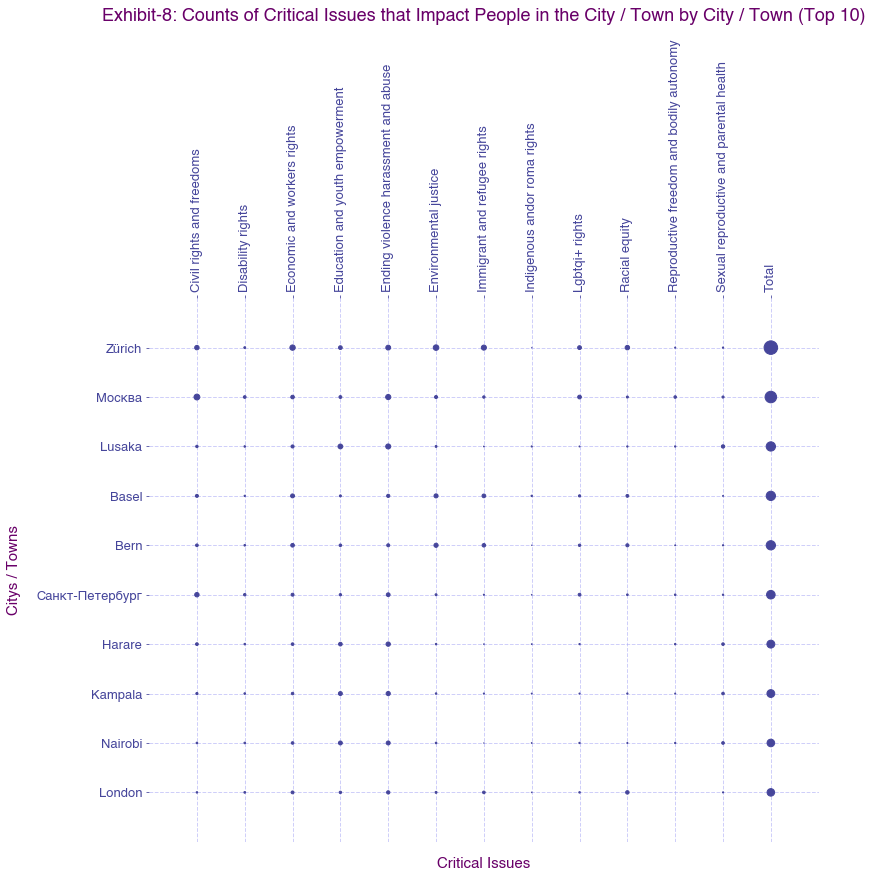

,Civil rights and freedoms,Disability rights,Economic and workers rights,Education and youth empowerment,Ending violence harassment and abuse,Environmental justice,Immigrant and refugee rights,Indigenous andor roma rights,Lgbtqi+ rights,Racial equity,Reproductive freedom and bodily autonomy,Sexual reproductive and parental health,Total
City town,,,,,,,,,,,,,
Zürich,98,17,144,69,116,154,129,1,73,99,6,8,914
Москва,169,37,63,41,132,46,29,0,69,21,33,23,663
Lusaka,29,12,47,112,126,18,3,7,5,9,9,55,432
Basel,45,9,77,20,51,82,69,10,24,40,0,4,431
Bern,36,13,66,33,45,86,62,1,29,47,4,7,429
Санкт-Петербург,97,29,43,27,71,19,6,2,39,14,12,9,368
Harare,38,12,34,66,93,11,2,3,8,0,10,34,311
Kampala,23,13,30,77,88,11,6,4,6,8,5,34,305
Nairobi,13,13,33,76,78,13,1,3,9,5,8,36,288


In [14]:
# EXHIBIT-8: Regional issues by citys/towns

# Specify the text to use in filtering out unncessary column
filter_out = "issue_city"

# Find the necesssary columns
filtered_cols = col_filter(filter_out)
subset_columns = ["city_town"] + filtered_cols

# Create a data subset with the filtered-in columns
data_city_regional_issues = create_data_subset(subset_columns)

# Check any nan value rows
check_na(data_city_regional_issues, if_display=False)

# Create more plot-presentable names
new_col_names = update_col_names(subset_columns, remove_word=filter_out)

# Replace the column names with more plot-presentable names
data_city_regional_issues = prettify_cols(data_city_regional_issues, subset_columns, new_col_names)

# Aggregate the data
data_city_regional_issues = data_city_regional_issues.groupby(["City town"]).sum().reset_index()

# Add total column
data_city_regional_issues["Total"] = data_city_regional_issues.iloc[:,1:].sum(axis=1)

# Sort by Total and slice the data
data_city_regional_issues = data_city_regional_issues.nlargest(SHOW_ROW, 'Total')
data_city_regional_issues.sort_values(by=['Total'], ascending=True, inplace=True)

# Get the plot data
x_cols, y_cols, values = plot_catscatter(data_city_regional_issues, SHOW_ROW)
catscatter_data = pd.DataFrame({"city": y_cols, "regional_issues": x_cols, "responses": values})

# Figure parameters
fig = plt.figure(figsize=(12, 10))

# Plot
catscatter(catscatter_data, "regional_issues", "city", "responses", color=CMAP2, fontsize=TICK_SIZE*RATIO, ratio=RATIO-0.3)
plt.title("Exhibit-8: Counts of Critical Issues that Impact People in the City / Town by City / Town (Top 10)", fontsize=TITLE_FONT_SIZE*RATIO, color=TITLE_COLOR, y=1.5)
plt.xlabel("Critical Issues", fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
plt.ylabel("Citys / Towns", fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
plt.show()

# Set the first column as index
data_city_regional_issues = data_city_regional_issues.set_index("City town")

# Display the data
print("\n")
# display(data_city_personal_issues.head(SHOW_ROW))
data_city_regional_issues.sort_values(by=['Total'], ascending=False, inplace=True)
display(data_city_regional_issues.head(SHOW_ROW))



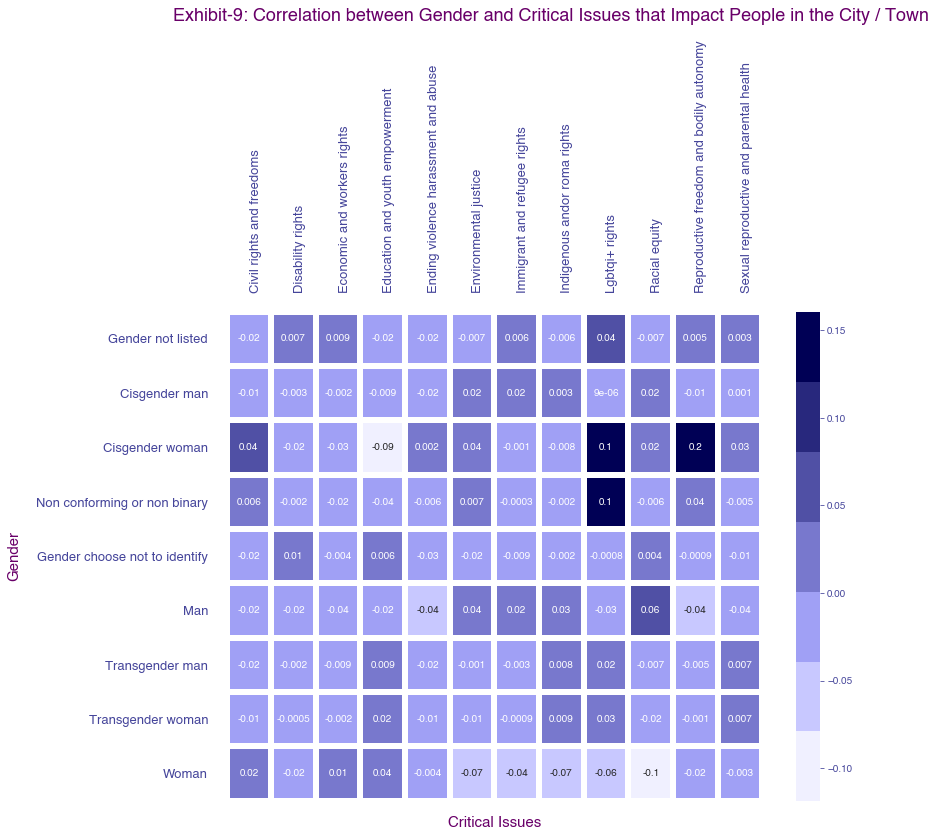

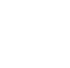

In [15]:
# EXHIBIT-9: Correlation between regional issues and gender

# Specify the text to use in filtering out unncessary column
filter_out = "issue_city"

# Find the necesssary columns
filtered_cols = col_filter(filter_out)
subset_columns = genders + filtered_cols

# Create a data subset with the filtered-in columns
data_gender_regional_issues = create_data_subset(subset_columns)

# Check any nan value rows
check_na(data_gender_regional_issues, if_display=False)

# Create more plot-presentable names
new_col_names = update_col_names(subset_columns, remove_word=filter_out)

# Replace the column names with more plot-presentable names
data_gender_regional_issues = prettify_cols(data_gender_regional_issues, subset_columns, new_col_names)

data_gender_regional_issues_corr = corr_table(data_gender_regional_issues, genders_revised, new_col_names, 
                                              "Gender", "Critical Isues")

# Plot correlation 
x_label = "Critical Issues"
y_label = "Gender"
y_loc = 1.35
w = 12
h = 9
heatmap_title = "Exhibit-9: Correlation between Gender and Critical Issues that Impact People in the City / Town"
plot_heatmap(data_gender_personal_issues_corr, heatmap_title, x_label, y_label, y_loc, w, h)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,1))
hide_axes(ax)
plt.show()



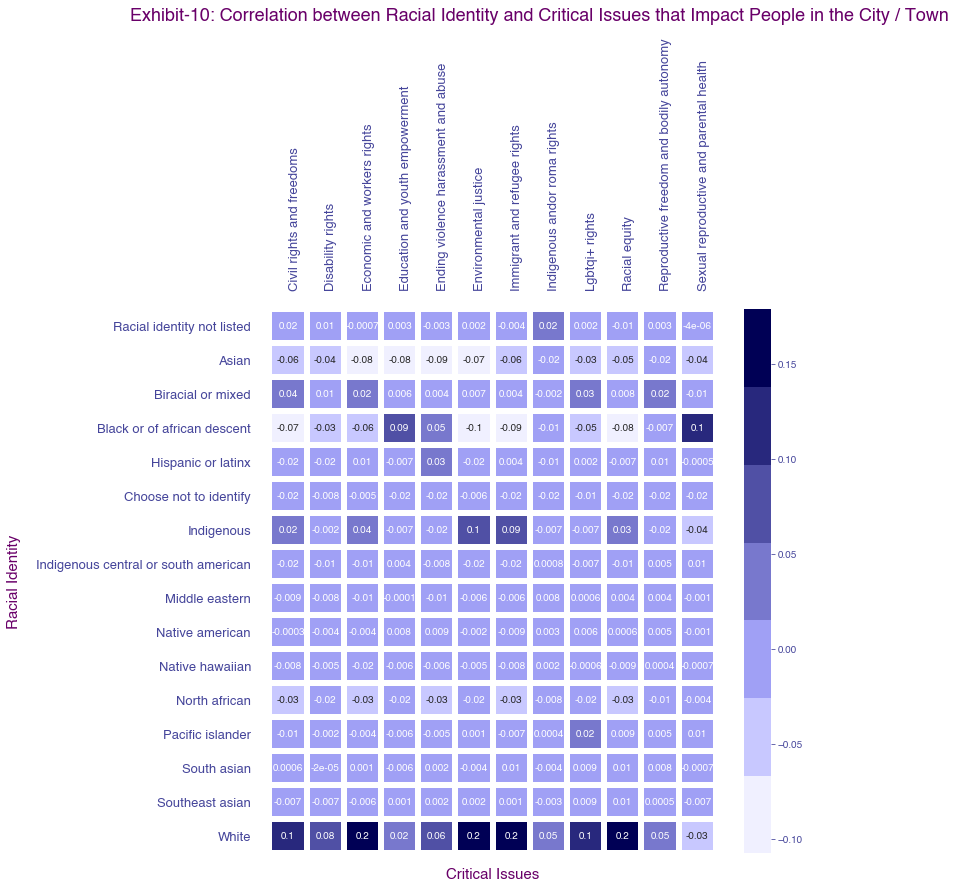

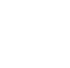

In [16]:
# EXHIBIT-10: Correlation between regional issues and racial identity

# Specify the text to use in filtering out unncessary column
filter_out = "issue_city"

# Find the necesssary columns
filtered_cols = col_filter(filter_out)
subset_columns = racial_ids + filtered_cols

# Create a data subset with the filtered-in columns
data_race_regional_issues = create_data_subset(subset_columns)

# Check any nan value rows
check_na(data_race_regional_issues, if_display=False)

# Create more plot-presentable names
new_col_names = update_col_names(subset_columns, remove_word=filter_out)

# Replace the column names with more plot-presentable names
data_race_regional_issues = prettify_cols(data_race_regional_issues, subset_columns, new_col_names)

data_race_regional_issues_corr = corr_table(data_race_regional_issues, racial_ids_revised, new_col_names, 
                                              "Racial Identity", "Critical Isues")

# Plot correlation 
x_label = "Critical Issues"
y_label = "Racial Identity"
y_loc = 1.30
w = 10
h = 10
heatmap_title = "Exhibit-10: Correlation between Racial Identity and Critical Issues that Impact People in the City / Town"
plot_heatmap(data_race_regional_issues_corr, heatmap_title, x_label, y_label, y_loc, w, h)
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(1,1))
hide_axes(ax)
plt.show()



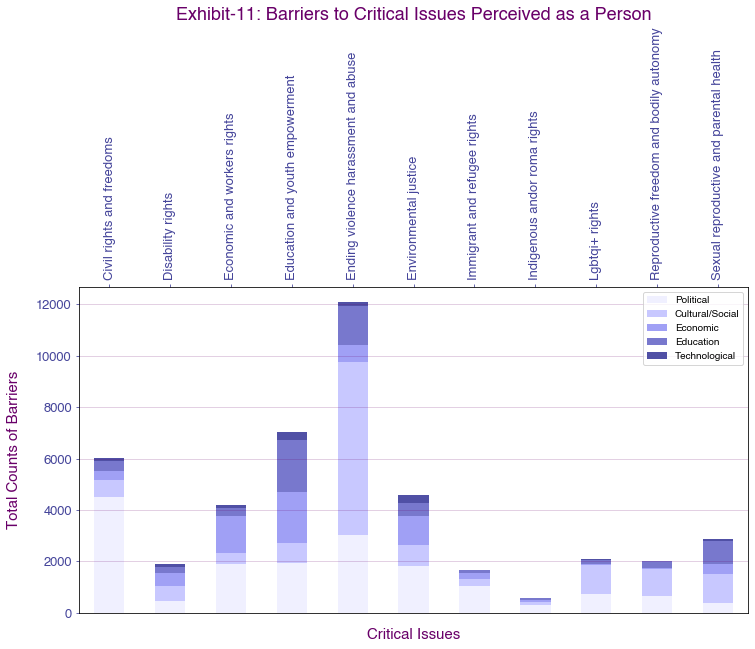

,Civil rights and freedoms,Disability rights,Economic and workers rights,Education and youth empowerment,Ending violence harassment and abuse,Environmental justice,Immigrant and refugee rights,Indigenous andor roma rights,Lgbtqi+ rights,Reproductive freedom and bodily autonomy,Sexual reproductive and parental health
Cultural/Social,683,603,423,801,6713,822,288,149,1114,1026,1118
Economic,318,477,1452,1977,688,1112,209,73,15,62,390
Education,416,262,313,2038,1518,501,116,61,181,266,891
Political,4495,456,1886,1918,3024,1824,1040,287,750,660,400
Technological,92,119,128,316,138,330,18,7,16,20,86


In [17]:
# EXHIBIT-11: Barriers to personal issues

# Specify the text to use in filtering out unncessary column
filter_out = "barrier_person"

# Find the necesssary columns
filtered_cols = col_filter(filter_out)

# Create a data subset with the filtered-in columns
data_barrier_personal_issues = create_data_subset(filtered_cols)

# Check any nan value rows
# check_na(data_barrier_personal_issues, if_display=False)

# Create more plot-presentable names
new_col_names = update_col_names(filtered_cols, remove_word=filter_out)

# Replace the column names with more plot-presentable names
data_barrier_personal_issues = prettify_cols(data_barrier_personal_issues, filtered_cols, new_col_names)

# Create a dataframe for the stacked bar chart
col_value_counts, df_stacked_bar = prepare_for_stacked_bar(data_barrier_personal_issues, new_col_names)

# Figure labels data
title, x_label, y_label, y_loc = 'Exhibit-11: Barriers to Critical Issues Perceived as a Person', 'Critical Issues', 'Total Counts of Barriers', 1.8

# Plot chart
stacked_bar(df_stacked_bar, title, x_label, y_label, y_loc)

# Display the data
print("\n")
display(col_value_counts)

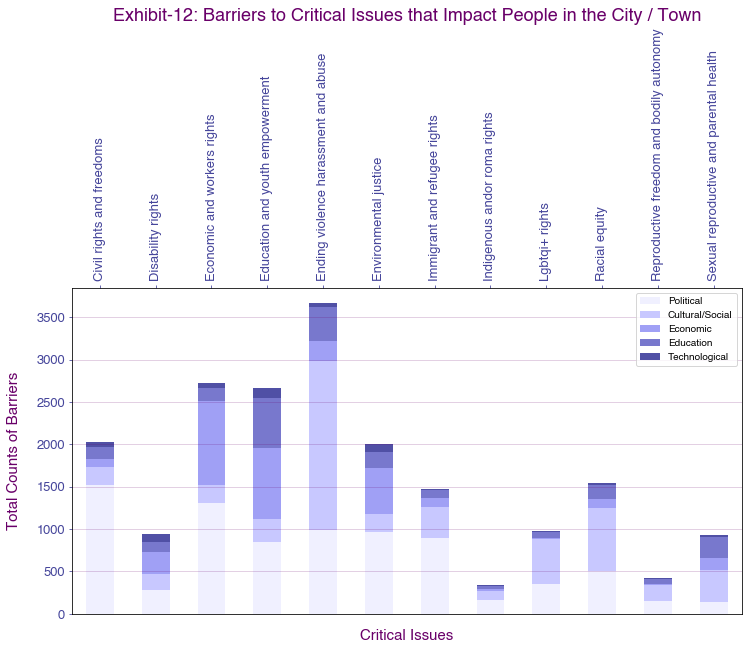

,Civil rights and freedoms,Disability rights,Economic and workers rights,Education and youth empowerment,Ending violence harassment and abuse,Environmental justice,Immigrant and refugee rights,Indigenous andor roma rights,Lgbtqi+ rights,Racial equity,Reproductive freedom and bodily autonomy,Sexual reproductive and parental health
Cultural/Social,223,182,216,269,2005,205,361,108,531,739,188,377
Economic,86,259,994,847,234,551,104,28,13,105,16,134
Education,145,122,150,582,393,187,98,33,72,174,60,254
Political,1514,286,1302,846,983,967,897,161,353,506,150,145
Technological,60,87,56,118,50,93,8,8,9,15,9,24


In [18]:
# EXHIBIT-12: Barriers to regional issues

# Specify the text to use in filtering out unncessary column
filter_out = "barrier_city"

# Find the necesssary columns
filtered_cols = col_filter(filter_out)

# Create a data subset with the filtered-in columns
data_barrier_regional_issues = create_data_subset(filtered_cols)

# Check any nan value rows
# check_na(data_barrier_regional_issues, if_display=False)

# Create more plot-presentable names
new_col_names = update_col_names(filtered_cols, remove_word=filter_out)

# Replace the column names with more plot-presentable names
data_barrier_regional_issues = prettify_cols(data_barrier_regional_issues, filtered_cols, new_col_names)

# Create a dataframe for the stacked bar chart
col_value_counts, df_stacked_bar = prepare_for_stacked_bar(data_barrier_regional_issues, new_col_names)

# Figure labels data
title, x_label, y_label, y_loc = 'Exhibit-12: Barriers to Critical Issues that Impact People in the City / Town', 'Critical Issues', 'Total Counts of Barriers', 1.8

# Plot chart
stacked_bar(df_stacked_bar, title, x_label, y_label, y_loc)

# Display the data
print("\n")
display(col_value_counts)


In [19]:
# Create a new dataframe with the relevant columns
df_text = data[relevant_cols]

# Drop nan rows in the comments column
df_text = df_text.dropna(subset=["progress_10_years_tr"])

# Clean text for further analysis
df_text["progress_10_years_tr"] =  df_text["progress_10_years_tr"].apply(clean_text)

# Calculate polarity score
polarity = lambda x: TextBlob(x).sentiment.polarity
df_text["Polarity"] = df_text["progress_10_years_tr"].apply(polarity)


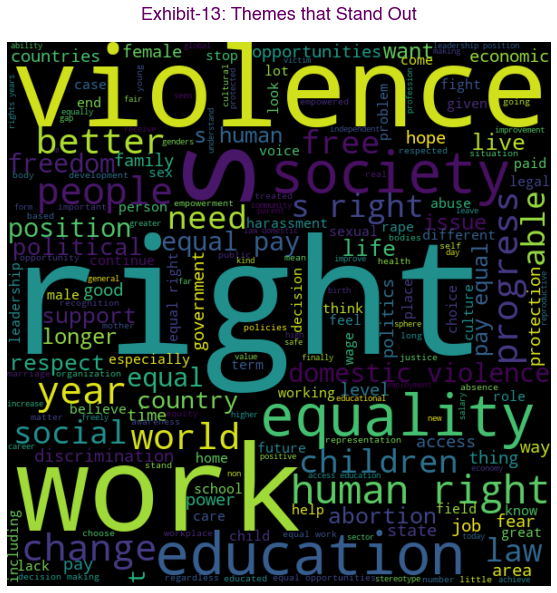

In [21]:
# EXHIBIT-13: Outstanding issues

# Convert the comments column to list 
comments_list = df_text["progress_10_years_tr"].tolist()

# Convert to string and replace extra space
comments = "".join(comments_list).replace("  ", " ")

# Create the wordcloud object
wordcloud = WordCloud(width=600, height=600, margin=0).generate(comments)

# Display the generated image
plt.figure(figsize=(10,10))
plt.title("Exhibit-13: Themes that Stand Out", fontsize=TITLE_FONT_SIZE*RATIO, color=TITLE_COLOR, y=1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

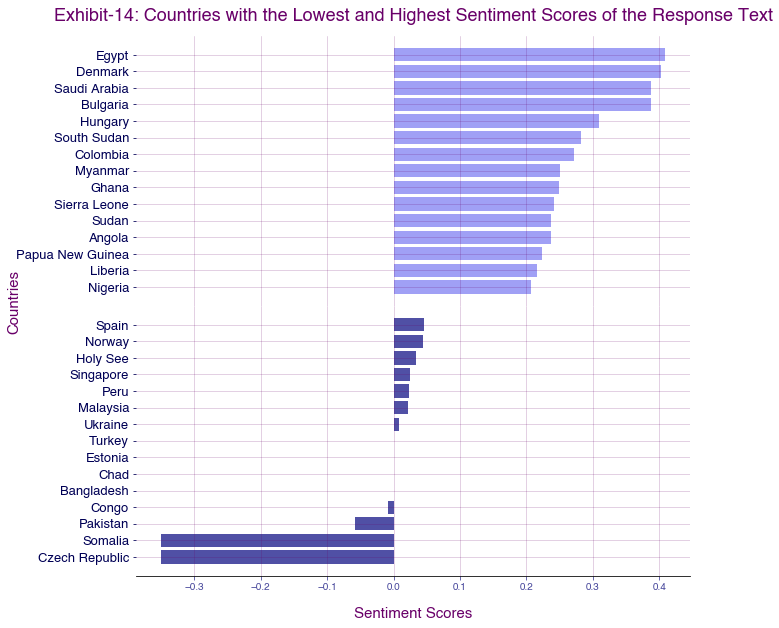

In [22]:
# EXHIBIT-14: Polarity scores of comments by country

# Create a new data subset
df_country_text = df_text[["country_of_residence", "Polarity"]]

# Replace the column names with more plot-presentable names
old_column_name = ["country_of_residence"]
new_col_name = ["Country of residence"]
df_country_text = prettify_cols(df_country_text, old_column_name, new_col_name)

# Correction
df_country_text.replace(to_replace="South ?Sudan", value="South Sudan", inplace=True)

# Prepare the dataframe for the chart
df_country_text, df_country_text_top, df_country_text_bottom = prepare_for_bidirectional_chart(df_country_text, 
                                                                n=15, col="Country of residence", by="Polarity")

# Data and parameters for the chart
top_x = df_country_text_top["Polarity"]
top_y = df_country_text_top["Country of residence"]
bottom_x = df_country_text_bottom["Polarity"]
bottom_y = df_country_text_bottom["Country of residence"]
title = "Exhibit-14: Countries with the Lowest and Highest Sentiment Scores of the Response Text"
x_label = "Sentiment Scores"
y_label = "Countries"

bidirectional_plot(top_x, top_y, bottom_x, bottom_y, title, x_label, y_label)


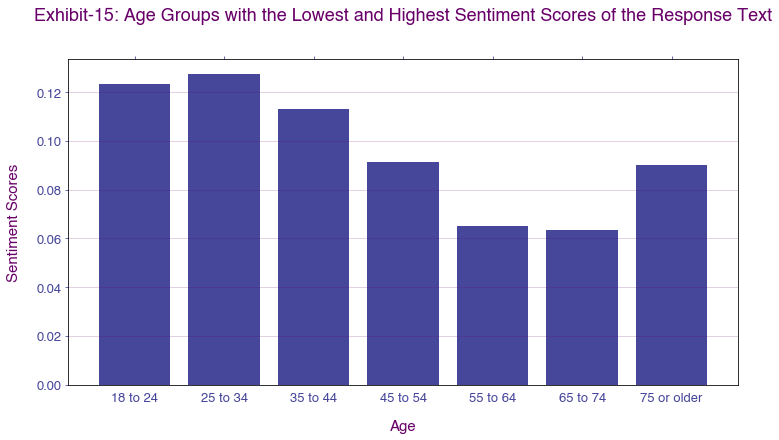

In [23]:
# EXHIBIT-15: Polarity scores of comments by age

# Create a new data subset
df_age_text = df_text[["age", "Polarity"]]

# Replace the column names with more plot-presentable names
old_column_name = ["age"]
new_col_name = ["Age"]
df_age_text = prettify_cols(df_age_text, old_column_name, new_col_name)

# Prepare the dataframe for the chart
df_age_text, df_age_text_top, df_age_text_bottom = prepare_for_bidirectional_chart(df_age_text, n=8, 
                                                                                   col="Age", by="Age")

# Data and parameters for the chart
top_x = df_age_text_top["Polarity"]
top_y = df_age_text_top["Age"]
bottom_x = df_age_text_bottom["Polarity"]
bottom_y = df_age_text_bottom["Age"]
title = "Exhibit-15: Age Groups with the Lowest and Highest Sentiment Scores of the Response Text"
x_label = "Age"
y_label = "Sentiment Scores"
y_loc = 1.10

# Plot
plt.bar(top_y, top_x, align='center', color=CMAP2[2])

# Chart decoration
plt.title(title, fontsize=TITLE_FONT_SIZE*RATIO, color=TITLE_COLOR, y=y_loc) # title of plot
plt.xlabel(x_label, fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
plt.ylabel(y_label, fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
plt.tick_params(axis='x', labelsize=TICK_SIZE*RATIO, labeltop=False, labelbottom=True)
plt.tick_params(axis='y', labelsize=TICK_SIZE*RATIO, labelright=False, labelleft=True)
plt.grid(True, axis="y", color=LABEL_COLOR, linewidth=0.6, alpha=0.3)
plt.show()


In [ ]:
# # EXHIBIT-16: Polarity scores of comments by gender






# # Prepare the dataframe for the chart
# df_age_text, df_age_text_top, df_age_text_bottom = prepare_for_bidirectional_chart(df_age_text, n=8, 
#                                                                                    col="Age", by="Age")

# # Data and parameters for the chart
# top_x = df_age_text_top["Polarity"]
# top_y = df_age_text_top["Age"]
# bottom_x = df_age_text_bottom["Polarity"]
# bottom_y = df_age_text_bottom["Age"]
# title = "Exhibit-15: Age Groups with the Lowest and Highest Sentiment Scores of the Response Text"
# x_label = "Age"
# y_label = "Sentiment Scores"
# y_loc = 1.10

# # Plot
# plt.bar(top_y, top_x, align='center', color=CMAP2[2])

# # Chart decoration
# plt.title(title, fontsize=TITLE_FONT_SIZE*RATIO, color=TITLE_COLOR, y=y_loc) # title of plot
# plt.xlabel(x_label, fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
# plt.ylabel(y_label, fontsize=LABEL_FONT_SIZE*RATIO, color=LABEL_COLOR, labelpad=PAD)
# plt.tick_params(axis='x', labelsize=TICK_SIZE*RATIO, labeltop=False, labelbottom=True)
# plt.tick_params(axis='y', labelsize=TICK_SIZE*RATIO, labelright=False, labelleft=True)
# plt.grid(True, axis="y", color=LABEL_COLOR, linewidth=0.6, alpha=0.3)
# plt.show()

In [24]:
# # Create a new data subset
# df_gender_text = df_text[[*genders,  "Polarity"]]

# # Replace the column names with more plot-presentable names
# old_column_name = genders
# new_col_name = genders_revised
# df_gender_text = prettify_cols(df_gender_text, old_column_name, new_col_name)

# def describe_gender(x):

#     gender_list = []
#     for i in x:
#         if i == 1:
#             index = int(x.index(i))
#             gender_list.append(genders_revised[index])
#         else:
#             continue
#     return gender_list

# df_gender_text["Gid"] = df_gender_text.loc[:, df_gender_text.columns != "Polarity"].values.tolist()
# df_gender_text = df_gender_text.dropna(subset=["Gid"])
# df_gender_text["Gid"] = df_gender_text["Gid"].apply(describe_gender)
# df_gender_text.head(50)